# HR Analytics Project- Understanding the Attrition in HR

In [34]:
import pandas as pd
import numpy as np

In [35]:
# Importing a dataset into a dataframe
df = pd.read_csv('F:\ibm-hr-analytics-employee-attrition-performance\\WA_Fn-UseC_-HR-Employee-Attrition.csv')

#### Zero Variance Check

In [36]:
df.nunique().nsmallest(10)

EmployeeCount        1
Over18               1
StandardHours        1
Attrition            2
Gender               2
OverTime             2
PerformanceRating    2
BusinessTravel       3
Department           3
MaritalStatus        3
dtype: int64

In [37]:
# EmployeeCount, Over18 and StandardHours variables have zero variance
# We can drop these variables

df.drop(['StandardHours'], axis=1, inplace=True)
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['Over18'], axis=1, inplace=True)

In [38]:
df.EmployeeNumber.values

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

#### Null value Check

In [39]:
df.isnull().sum()

# No Null values present in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Duplicate Check

In [40]:
df[df.duplicated()]

# No Duplicate values present in the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


#### Correlation Check

In [41]:
corrmat = df.corr()
corrmat

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<AxesSubplot:>

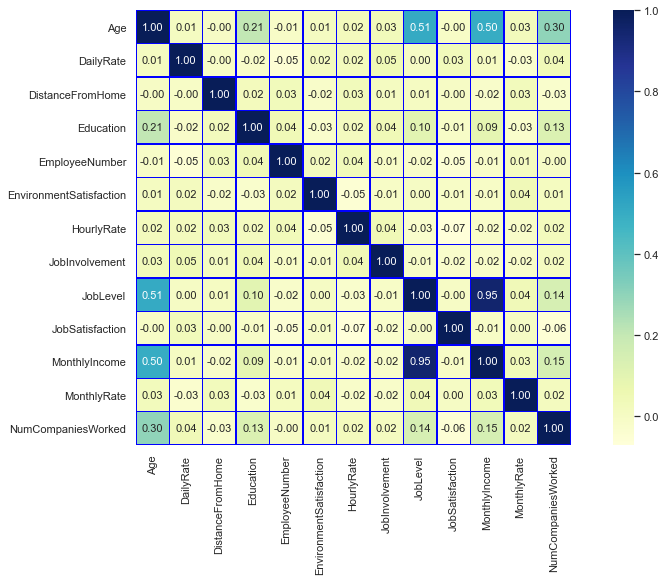

In [42]:
# The dataset contains large number of columns to be accomodated in a single HeatMap, hence dividing it in 3 HeatMaps
# Importing the required packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

h1 = corrmat.loc['Age':'NumCompaniesWorked', 'Age':'NumCompaniesWorked']
h2 = corrmat.loc['PercentSalaryHike':, 'Age':'NumCompaniesWorked']
h3 = corrmat.loc['PercentSalaryHike':, 'PercentSalaryHike':]

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(h1, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, cmap="YlGnBu", 
            linewidths=0.5, linecolor='blue')

# Insight - MonthlyIncome and JobLevel are highly correlated

<AxesSubplot:>

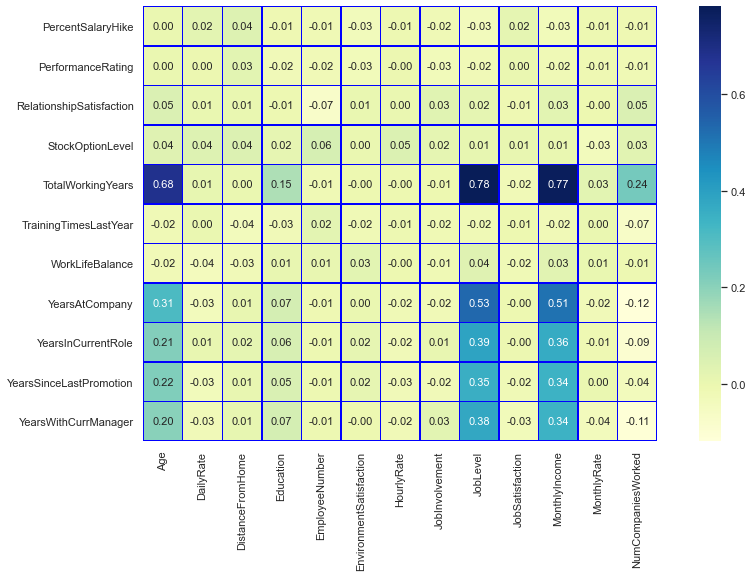

In [43]:
sns.heatmap(h2, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, cmap="YlGnBu", 
            linewidths=0.5, linecolor='blue')

# Insights:
# TotalWorkingYears and JobLevel are highly correlated
# TotalWorkingYears and MonthlyIncome are highly correlated

<AxesSubplot:>

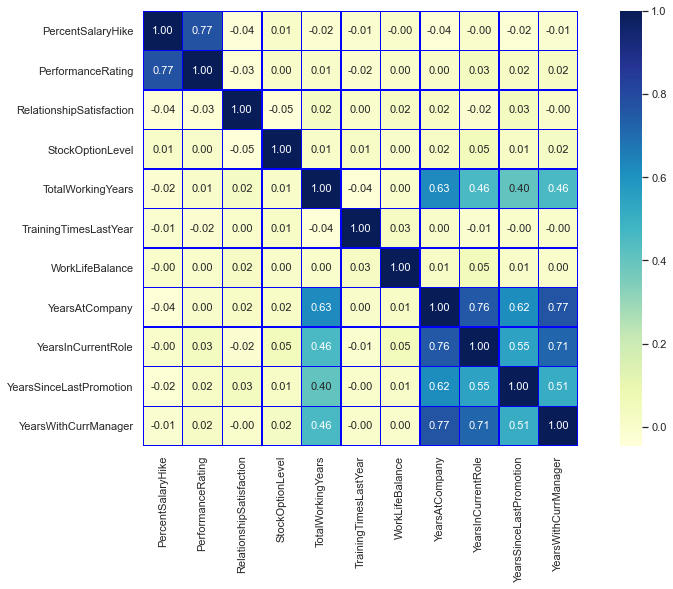

In [44]:
sns.heatmap(h3, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, cmap="YlGnBu", 
            linewidths=0.5, linecolor='blue')

# Insights:
# PercentSalaryHike and PerformanceRating are highly correlated
# YearsInCurrentRole and YearsAtCompany are highly correlated
# YearsWithCurrManager and YearsAtCompany are highly correlated

In [45]:
# We need to drop the correlated variables as it shall affect Logistic Regressions and SVM outputs

df_final = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
df_final

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,24907,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,12290,4,No,3,3,1,3,3,5,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,21457,4,No,3,1,1,5,3,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,5174,1,Yes,4,2,1,0,3,6,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,13243,2,No,3,4,0,3,2,9,0


In [46]:
df_final.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

# Data Pre-processing

#### Label Encoding

In [47]:
from sklearn import preprocessing

def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    return res_df

In [48]:
encoded_df = preprocessor(df_final)

#### Feature Selection

In [49]:

X = encoded_df.drop(['Attrition'],axis =1)
y = encoded_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

#### Standardiation of Features

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [51]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


#### Train - Test Split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression Model Implementation

In [53]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

# Model Performance Analysis 

### Confusion Matrix

Text(0.5, 510.88, 'Predicted label')

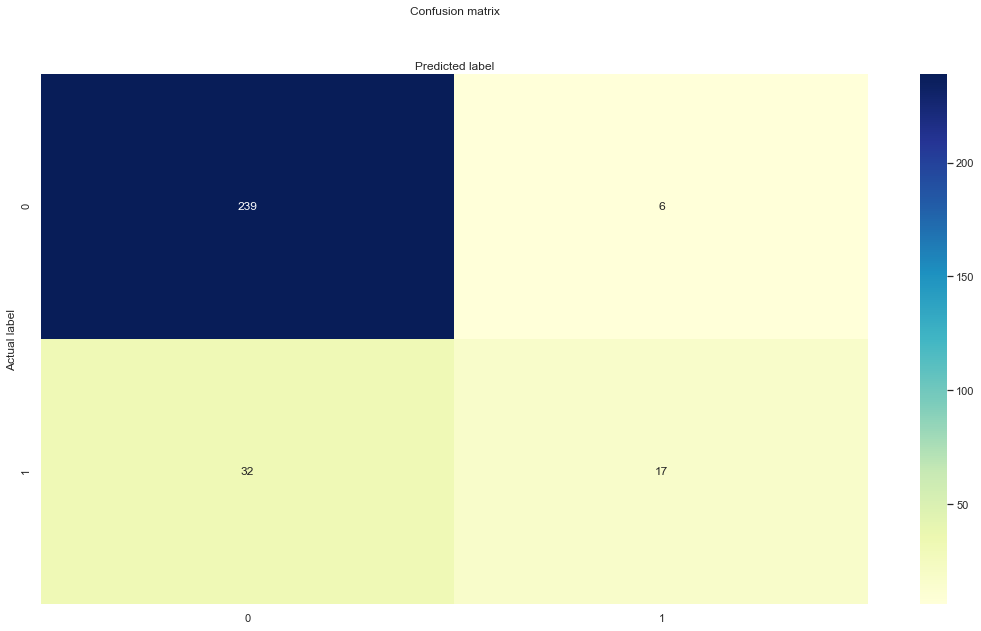

In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Accuracy, Precision and Recall

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8707482993197279
Precision: 0.7391304347826086
Recall: 0.3469387755102041


### Area Under the Curve

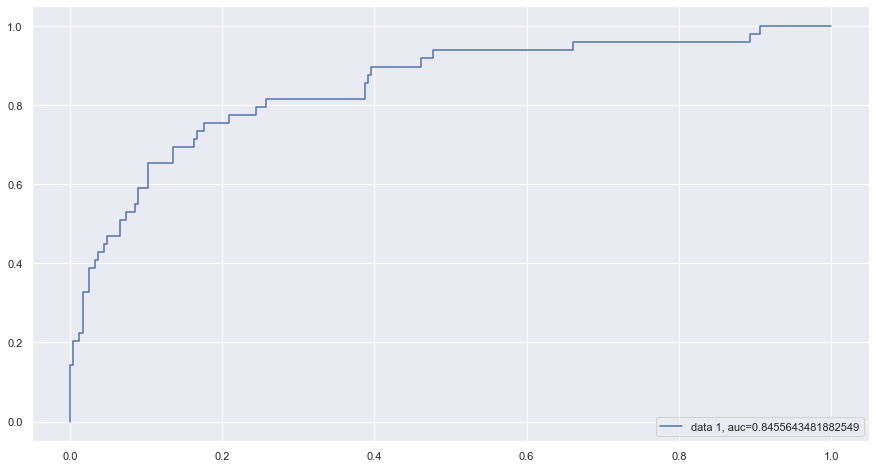

In [56]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Support Vector Machines Implementation

### Implementation with Detafult HyperParameters

In [57]:
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC() # Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8639455782312925


### Linear Kernel

In [58]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8333333333333334


### Polynomial Kernel

In [59]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8605442176870748


### Radial Kernel

In [60]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8639455782312925


### Optimizing the HyperParameters using GridSearchCV

In [61]:
from sklearn.svm import SVC
svm_model= SVC()


In [62]:
tuned_parameters = {
 'C': (np.arange(2,3,0.1)) , 'kernel': ['linear', 'poly', 'rbf'],
 'C': (np.arange(2,3,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['linear', 'poly', 'rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.1,1], 'C':(np.arange(2,3,0.1)) , 'kernel':['poly', 'linear','rbf']
    }

In [63]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=2,scoring='accuracy')

In [64]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.8554421768707483


In [65]:
print(model_svm.best_params_)

{'C': 2.900000000000001, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


Text(0.5, 510.88, 'Predicted label')

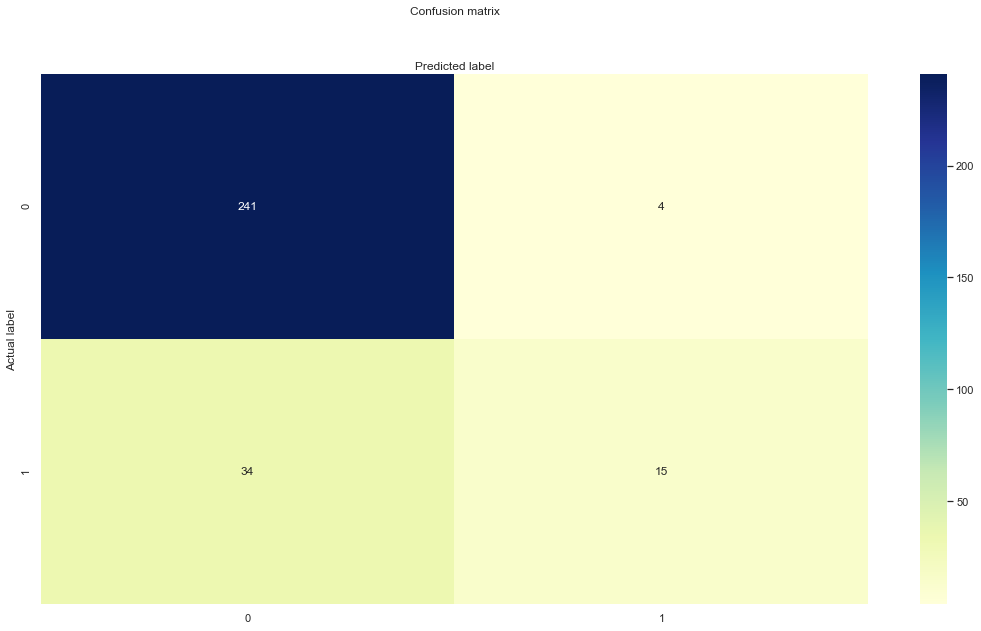

In [66]:
y_pred=model_svm.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8707482993197279
Precision: 0.7894736842105263
Recall: 0.30612244897959184
